In [1]:
import pandas as pd
import numpy as np
import pymoo as pm
import matplotlib.pyplot as plt

from pymoo.visualization.scatter import Scatter
from pymoo.problems import get_problem

In [2]:
re = pd.read_csv("fin_results.csv") # "nn_by_predictor.csv")#
print(len(re))
print(re.columns)


re = re[['trialJobId', 'features', 'batch_s', 'acc', 'latency',
       'lat_std', 'memory', 'num_channel', 'kernel_size', 'stride', 'padding',
       'poolchoice', 'kernel_size_pool', 'stride_size_pool', 'memory_usage']]#, 'model_memory']]
re.columns = ['trialJobId', 'features', 'batch_s', 'accuracy', 'latency',
       'lat_std', 'memory', 'num_channel', 'kernel_size', 'stride', 'padding',
       'poolchoice', 'kernel_size_pool', 'stride_size_pool', 'memory_peak']#, 'model_memory']

labels = ["accuracy", "latency", "memory", "features", "batch_s"]#, #"lat_std","features","batch_s"]

re_F = re[labels].values

1717
Index(['Unnamed: 0', 'trialJobId', 'features', 'batch_s', 'acc', 'latency',
       'lat_std', 'memory', 'num_channel', 'kernel_size', 'stride', 'padding',
       'poolchoice', 'kernel_size_pool', 'stride_size_pool', 'memory_usage'],
      dtype='object')


In [3]:
re.accuracy.max(), re.accuracy.min()

(96.13060435208212, 76.18600766133474)

In [4]:
re.latency.max(), re.latency.min()

(249.55510499538303, 8.125228614973203)

In [5]:
re.memory.max(), re.memory.min()

(44.690924, 11.175201)

 a solution is considered "dominated" by another solution if the other solution performs better in at least one objective and is no worse in all other objectives. In other words, a solution A is dominated by solution B if solution B is at least as good as solution A in all objectives and strictly better in at least one objective.

In [6]:
dominateds = np.zeros(len(re_F))

for i in range(len(re_F)):
    a = re_F[i]
    for j in range(len(re_F)):
        b = re_F[j]
        if i==j:
            continue
        
        better = [a[0] < b[0], a[1] > b[1], a[2] > b[2]]
        no_worse = [a[0]<=b[0], a[1]>=b[1], a[2]>=b[2]]
        
        if (sum(better) > 0) & (sum(no_worse) == 3):
            dominateds[i] = 1
            print(a)
            print(b)
            print("--")
            break
                    
non_dominateds = ~dominateds.astype("bool")                    
len(re_F) - dominateds.sum() 


[ 92.93217043 135.50953099  25.130585     7.          16.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[95.08654619 31.52334761 44.690924    7.         16.        ]
[95.31860528 31.52334761 44.690924    7.         16.        ]
--
[95.07823715 18.62735885 11.191843    7.         16.        ]
[95.24402651 18.30326993 11.177505    7.         16.        ]
--
[94.62248639 19.29670651 11.191843    7.         16.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[93.81053195 42.13934092 25.130585    7.         16.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[93.91815803 39.79430139 25.151911    7.         16.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[94.45669703 70.06556376 44.690744    7.         16.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[94.53139598 70.03289874 44.66207     7.         16.        ]
[95.07823715 18.62735885 11.191843    7.    

[92.18672362 19.66204849 11.175381    5.         16.        ]
[92.55798015 18.24053541 11.175201    5.         16.        ]
--
[ 87.68718868 235.99920261  44.677944     5.          16.        ]
[ 92.93217043 135.50953099  25.130585     7.          16.        ]
--
[91.54386298 39.5665904  25.142311    5.         16.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[89.39299832 39.5665904  25.142311    5.         16.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[ 87.04246166 233.7089188   44.657462     5.          16.        ]
[ 92.93217043 135.50953099  25.130585     7.          16.        ]
--
[90.30749367 40.86461896 25.142491    5.         16.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[91.07390251 39.08955445 25.126949    5.         16.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[93.34843775 30.54171851 44.657642    5.         16.        ]
[95.07823715 18.62735885 11.1

[ 91.89652432 234.09486235  44.66207      7.           8.        ]
[ 92.93217043 135.50953099  25.130585     7.          16.        ]
--
[94.92903841 30.63836686 44.66225     7.          8.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[ 92.02072041 225.95415404  44.690744     7.           8.        ]
[ 92.93217043 135.50953099  25.130585     7.          16.        ]
--
[ 93.21384684 135.73605256  25.130405     7.           8.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[94.71372787 70.03289874 44.66207     7.          8.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[94.96225396 18.85295729 11.177505    7.          8.        ]
[95.24402651 18.30326993 11.177505    7.         16.        ]
--
[95.63345947 18.74701914 11.191843    7.          8.        ]
[95.73283488  8.48450774 11.177685    7.         16.        ]
--
[95.08655649 31.10789566 44.690924    7.          8.        ]
[95.18598341 19.29670651

[84.69492345 64.94184047 11.185621    5.         32.        ]
[94.90420056 18.85295729 11.177505    7.         16.        ]
--
[89.2188743  40.86461896 25.142491    5.         32.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[91.4454956   8.58078207 11.185621    5.         32.        ]
[95.11151451  8.2908496  11.177685    7.         16.        ]
--
[90.30789142 69.21590029 44.657642    5.         32.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[86.12848646 63.55797269 11.175201    5.         32.        ]
[92.55798015 18.24053541 11.175201    5.         16.        ]
--
[ 84.81810449 136.97544032  25.142491     5.          32.        ]
[ 92.93217043 135.50953099  25.130585     7.          16.        ]
--
[85.1633541 66.0849756 11.175381   5.        32.       ]
[86.5733273 65.7940279 11.175201   5.        16.       ]
--
[82.79100222 65.35295819 11.185621    5.         32.        ]
[94.90420056 18.85295729 11.177505    7.         

[94.5728004  39.79430139 25.151911    7.         32.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[ 87.03178825 146.45596028  25.130585     7.          32.        ]
[ 92.93217043 135.50953099  25.130585     7.          16.        ]
--
[91.56513102 63.86808663 11.177505    7.         32.        ]
[94.90420056 18.85295729 11.177505    7.         16.        ]
--
[93.83537323 19.42247506 11.177685    7.         32.        ]
[94.90420056 18.85295729 11.177505    7.         16.        ]
--
[90.172725   65.47268779 11.192023    7.         32.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[95.32674264 31.33361587 44.66225     7.         32.        ]
[95.4925526  30.62162296 44.66225     7.         16.        ]
--
[94.75517693 19.29670651 11.191843    7.         32.        ]
[95.07823715 18.62735885 11.191843    7.         16.        ]
--
[93.86837247 68.29736211 44.690744    7.         32.        ]
[95.07823715 18.62735885 11.191843    7

5.0

In [7]:
re[non_dominateds]

trialJobId  features  batch_s   accuracy    latency    lat_std     memory  \
180      mCgkH         7       16  96.130604   8.187963   4.585620  11.177685   
502      o2jlI         5       16  95.450685   8.228115   4.663369  11.175381   
808      Hzt7M         7        8  95.790854  18.303270  16.018837  11.177505   
896      T9Npr         5        8  94.684184   8.125229   4.530924  11.175381   
923      KLDQp         5        8  93.967066  18.240535  15.960245  11.175201   

     num_channel  kernel_size  stride  padding  poolchoice  kernel_size_pool  \
180           32            3       2        1           0                 3   
502           32            3       2        1           0                 2   
808           32            3       2        1           1                 3   
896           32            3       2        1           0                 3   
923           32            3       2        1           1                 3   

     stride_size_pool  memory_peak  
180                 2   498.066895  
502                 2   220.657715  
808                 2   207.706543  
896                 2   281.208008  
923                 1   405.066895

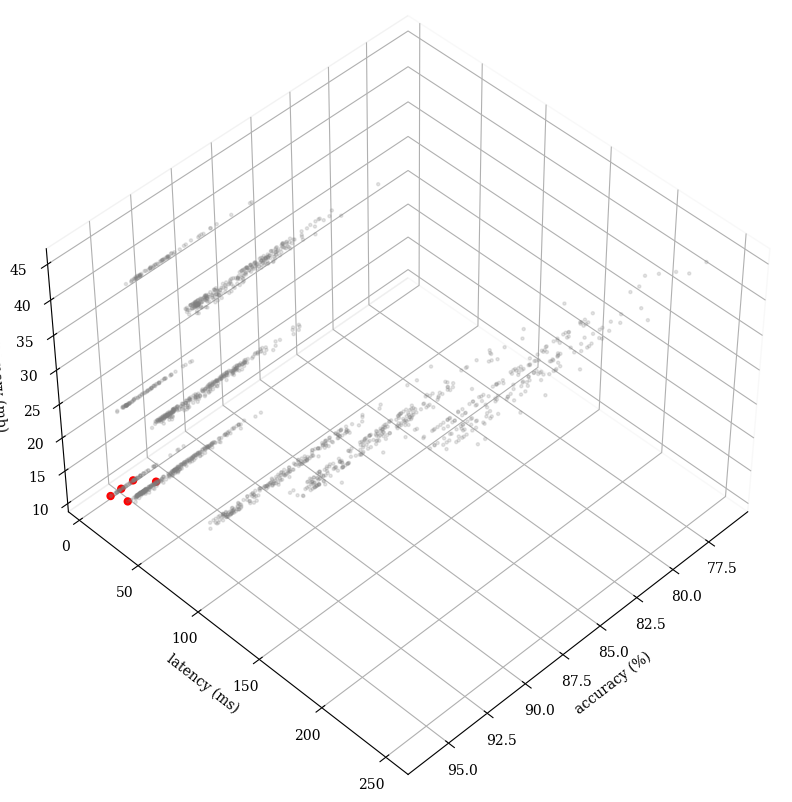

In [8]:

labels = ["accuracy", "latency", "memory"]

re_F = re[labels].values
F = re[labels].values

labels = ["accuracy (%)", "latency (ms)", "memory (mb)"]

plot = Scatter(tight_layout=True, figsize=(8,8), labels=labels)
plot.add(re_F, s=5, alpha=0.2, color="grey")
plot.add(re_F[non_dominateds], color="red", s=25, zorder=100)
plot.show()

In [9]:
from copy import deepcopy
re_ = deepcopy(re)
re_.columns = ['trialJobId', 'features', 'batch_s', 'Accuracy (%)', 'Latency (ms)', 'lat_std',
       'Memory (MB)', 'num_channel', 'kernel_size', 'stride', 'padding',
       'poolchoice', 'kernel_size_pool', 'stride_size_pool', 'memory_peak']
re_["Pareto-optimal"] = non_dominateds
re_['nd_size'] = [1 if nd else 0.5 for nd in non_dominateds]
re_['nd_col'] = ["red" if nd else "grey" for nd in non_dominateds]

In [10]:
import plotly.express as px

fig = px.scatter_3d(re_, x='Accuracy (%)', y='Latency (ms)', z='Memory (MB)',
              color='Pareto-optimal', symbol="Pareto-optimal", size="nd_size", opacity=0,
                   color_discrete_sequence=["grey", "red"])
fig.show()
fig.write_html("pareto.html")

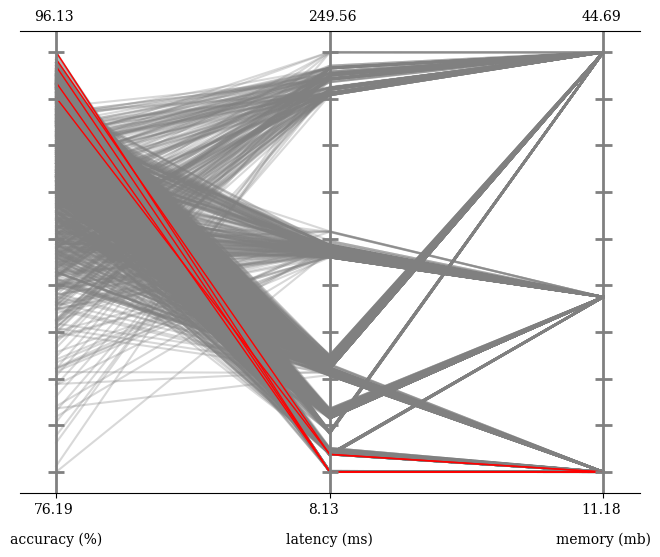

In [11]:
from pymoo.visualization.pcp import PCP
plot = PCP(title=("", {'pad': 30}),
           n_ticks=10,
           labels=labels
           )

plot.set_axis_style(color="grey", alpha=1)

plot.normalize_each_axis = True

plot.add(re_F, color="grey", alpha=0.3)
plot.add(re_F[non_dominateds], linewidth=1, color="red", label="Solution A")
plot.show()

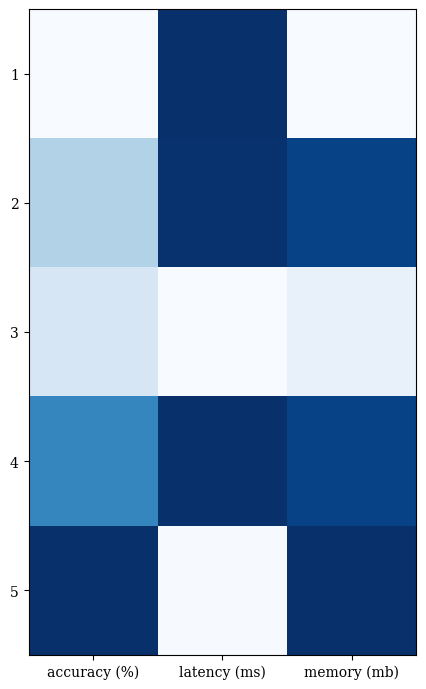

In [12]:
from pymoo.visualization.heatmap import Heatmap
Heatmap(labels=labels, figsize=(5,10)).add(re_F[non_dominateds]).show()

In [13]:
NDs = re[non_dominateds][['features', 'batch_s', 'accuracy', 'latency', 'lat_std',
       'memory', 'num_channel', 'kernel_size', 'stride', 'padding',
       'poolchoice', 'kernel_size_pool', 'stride_size_pool']]# # memory column -> onnx memory
NDs = NDs[['features', 'batch_s', 'accuracy', 'latency', 'lat_std', 'memory',
     'num_channel', 'kernel_size', 'stride', 'padding',
       'poolchoice', 'kernel_size_pool', 'stride_size_pool']]

NDs.round(2).reset_index(drop=True).to_csv("nonD.txt",  index=False)
NDs

features  batch_s   accuracy    latency    lat_std     memory  \
180         7       16  96.130604   8.187963   4.585620  11.177685   
502         5       16  95.450685   8.228115   4.663369  11.175381   
808         7        8  95.790854  18.303270  16.018837  11.177505   
896         5        8  94.684184   8.125229   4.530924  11.175381   
923         5        8  93.967066  18.240535  15.960245  11.175201   

     num_channel  kernel_size  stride  padding  poolchoice  kernel_size_pool  \
180           32            3       2        1           0                 3   
502           32            3       2        1           0                 2   
808           32            3       2        1           1                 3   
896           32            3       2        1           0                 3   
923           32            3       2        1           1                 3   

     stride_size_pool  
180                 2  
502                 2  
808                 2  
896                 2  
923                 1

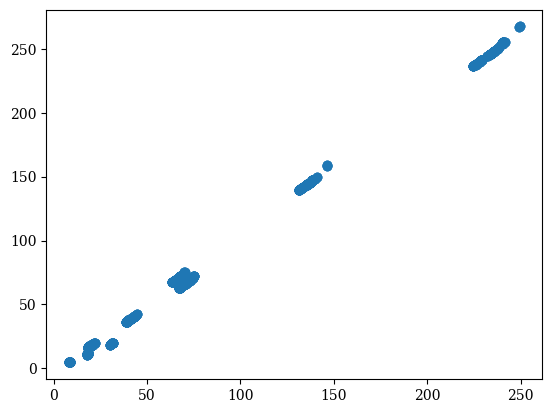

In [14]:
plt.scatter(re.latency, re.lat_std)

In [15]:
labels_ = ["accuracy", "latency", "memory", "features", "batch_s", "num_channel", "kernel_size", "padding", "kernel_size_pool", "stride_size_pool"]#, #"lat_std","features","batch_s"]
F = re[labels_].values
labels = ["Accuracy (%)", "Latency (ms)", "Memory (MB)", "features", "batch size", "channel", "kernel_size", "padding", "kernel_size_pool", "stride_size_pool"]


F_normed = F[non_dominateds] / F.max(axis=0)

F_normed = F_normed[re[non_dominateds]["poolchoice"].values.argsort()]  # sort by poolchoice
#F_normed = F_normed[F_normed[:, 4].argsort(kind='mergesort')]  # sort by features


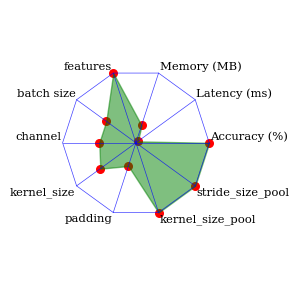

In [16]:
from pymoo.visualization.radar import Radar

fsize=(3,3)
plot1 = Radar(bounds=[0,1],
             axis_style={"color": 'blue'},
             point_style={"color": 'red', 's': 30},
             labels=labels,
            figsize=fsize, 
             tight_layout=True)
plot1.add(F_normed[0], color = "green")
plot1.show()

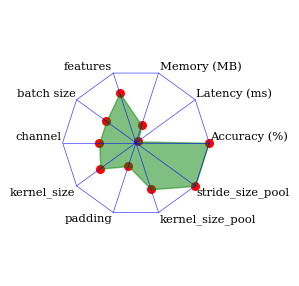

In [17]:
plot1 = Radar(bounds=[0,1],
             axis_style={"color": 'blue'},
             point_style={"color": 'red', 's': 30},
             labels=labels,
            figsize=fsize, 
             tight_layout=True)
plot1.add(F_normed[1], color = "green")
plot1.show()

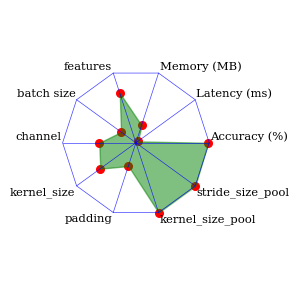

In [19]:
plot1 = Radar(bounds=[0,1],
             axis_style={"color": 'blue'},
             point_style={"color": 'red', 's': 30},
             labels=labels,
            figsize=fsize, 
             tight_layout=True)
plot1.add(F_normed[2], color = "green")
plot1.show()

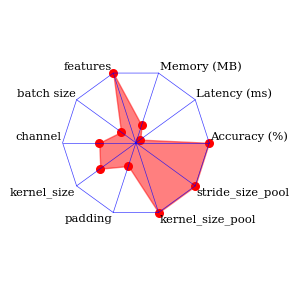

In [20]:
plot2 = Radar(bounds=[0,1],
             axis_style={"color": 'blue'},
             point_style={"color": 'red', 's': 30},
             labels=labels,
            figsize=fsize, 
             tight_layout=True)

plot2.add(F_normed[3], color = "red")
plot2.show()

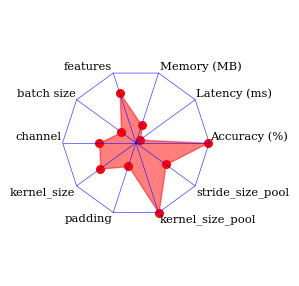

In [21]:
plot2 = Radar(bounds=[0,1],
             axis_style={"color": 'blue'},
             point_style={"color": 'red', 's': 30},
             labels=labels,
            figsize=fsize, 
             tight_layout=True)

plot2.add(F_normed[4], color = "red")
plot2.show()